# Analyzing Crime Data in LA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

'DR_NO'	Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits.

'Date Rptd'	Date reported - MM/DD/YYYY.

'DATE OCC'	Date of occurrence - MM/DD/YYYY.

'TIME OCC'	In 24-hour military time.

'AREA NAME'	The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

'Crm Cd Desc'	Indicates the crime committed.

'Vict Age'	Victim's age in years.

'Vict Sex'	Victim's sex: F: Female, M: Male, X: Unknown.

In [18]:
df = pd.read_csv(r'C:\Users\Shubh\OneDrive - The University of Texas at Dallas\Uni of Tex at Dallas\coursera\crimes.csv'\
                 ,parse_dates=['Date Rptd','DATE OCC'],dtype={'TIME OCC':str})

In [19]:
df.dtypes #all types are correct now

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

### 1. Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

In [35]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [38]:
df['Hour OCC']=df['TIME OCC'].str[:2].astype(int)

In [54]:
hour_data = df['Hour OCC'].value_counts().reset_index()
hour_data = hour_data.sort_values('count',ascending=False)
peak_crime_hour = hour_data.head(1)
peak_crime_hour
print(f"Peak Crime Hour in LA is: {peak_crime_hour['Hour OCC'][0]} PM with a total crime count of {peak_crime_hour['count'][0]}")

Peak Crime Hour in LA is: 12 PM with a total crime count of 17065


### 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [61]:
filtered_time_data = df[df['Hour OCC'].isin([22,23,24,1,2,3])].reset_index()
filtered_time_data['Hour OCC'].value_counts().reset_index() # checking if I got the right values filetered

,Hour OCC,count
0,22,11697
1,23,10039
2,1,7564
3,2,6352
4,3,5564


In [76]:
filtered_time_data_by_area = filtered_time_data.groupby('AREA NAME',as_index=False)['Hour OCC'].count()
filtered_time_data_by_area = filtered_time_data_by_area.sort_values('Hour OCC',ascending=False)
peak_night_crime_location = filtered_time_data_by_area.head(1)
print(f"Peak night crime location in LA is: {peak_night_crime_location['AREA NAME'][1]}")

Peak night crime location in LA is: Central


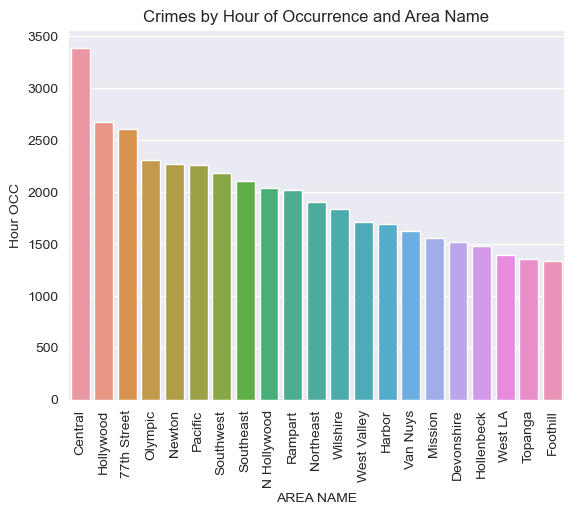

In [89]:
filtered_time_data_by_area
sns.set_style('darkgrid')
num_colors = 10
red_palette = sns.color_palette('Reds',n_colors=num_colors)
red_palette = red_palette[::-1]
sns.barplot(x='AREA NAME', y='Hour OCC', data =filtered_time_data_by_area)
plt.xticks(rotation=90)
plt.title('Crimes by Hour of Occurrence and Area Name')
plt.show()

 ### 3. Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). Save as a pandas Series called victim_ages.

In [90]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour OCC
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


In [94]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
df['Age_Bracket'] = pd.cut(df['Vict Age'],bins=age_bins, labels = age_labels)

In [95]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Hour OCC,Age_Bracket
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17,NaN
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11,26-34
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16,55-64
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12,26-34
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6,35-44


In [103]:
victim_ages = df['Age_Bracket'].value_counts().reset_index().sort_values('count',ascending=False)
victim_ages

,Age_Bracket,count
0,26-34,47470
1,35-44,42157
2,45-54,28353
3,18-25,28291
4,55-64,20169
5,65+,14747
6,0-17,4528


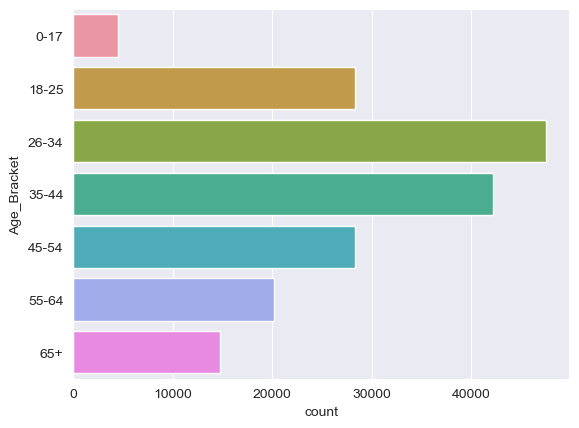

In [120]:
sns.barplot(x='count',y='Age_Bracket',data=victim_ages,errorbar='sd')
plt.show()